## Load Data

In [1]:
import numpy as np
import tensorflow as tf
import keras as kr
from keras.utils import to_categorical

# import data
import net

import time
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")


In [3]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [4]:
y_train_valid -= 769
y_test -= 769

In [5]:
perm = np.random.permutation(X_train_valid.shape[0])
numTrain = int(0.8*X_train_valid.shape[0])
numVal = X_train_valid.shape[0] - numTrain
Xtrain = X_train_valid[perm[0:numTrain]]
ytrain = y_train_valid[perm[0:numTrain]]
Xval = X_train_valid[perm[numTrain: ]]
yval = y_train_valid[perm[numTrain: ]]

In [6]:
Xtrain.shape

(1692, 22, 1000)

In [10]:
ytrain.shape

(1692,)

In [12]:
X_test.shape

(443, 22, 1000)

In [14]:
y_test.shape

(443,)

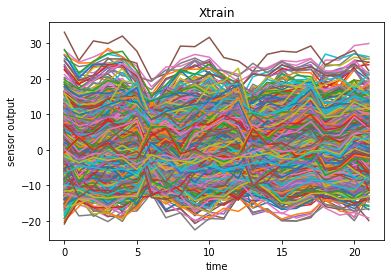

In [11]:
plt.plot(Xtrain[699,:,:])
# plt.plot(Xtrain[1,1,:])
plt.title('Xtrain')
plt.ylabel('sensor output')
plt.xlabel('time')
# plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# RNN

#### Three models are tested:
#### 1. Stride of 2 on 1D convolutions
#### 2. Stride of 1 and use max pools
#### 3. Stride of 1 and use average pools

In [11]:
Xtrain = np.transpose(Xtrain, (0,2,1))
Xval = np.transpose(Xval, (0,2,1))
Xtrain = Xtrain[0:400]
ytrain = ytrain[0:400]
print ('Training data shape: {}'.format(Xtrain.shape))
print ('Val data shape: {}'.format(Xval.shape))

Training data shape: (400, 1000, 22)
Val data shape: (423, 1000, 22)


In [20]:
RNNconfig = {
    'num_steps' : Xtrain.shape[1],
    'sensors' : Xtrain.shape[2],
    # LSTM
    'state_size' : 32,

    # CNN
    'filters' : 32,
    'strides' : 2,
	
    # Output
    'output_size' : 1,
    
    # Activations
    'c_act' : 'relu',
    'r_act' : 'hard_sigmoid',
    'rk_act' : 'tanh',
    
    'batch_size' : 512,
    'learning_rate' : 0.0012,
    'epochs' : 1,
    'reg' : 0.001,
    
    'rec_drop': 0.32,
    'drop' : 0.5,
    'cnn_drop' : 0.6,
}

Model 1: Run RNN with stride of 2 on convs

In [21]:
RNN_stride = net.RNN(RNNconfig)

RNN_stride.build_model(inception=True, res=True, strided=True, maxpool=False, avgpool=False, batchnorm=True)

m = RNN_stride.model
print(m.summary())

model_2 initialized.
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1000, 22)     0                                            
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 500, 32)      2848        input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 500, 32)      5664        input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 500, 32)      22560       input_2[0][0]                    
_______________________________________________________________________

In [ ]:
tic = time.time()

history_stride = RNN_stride.train(Xtrain, ytrain, Xval, yval, verbose=1)
# history_stride = RNN_stride.train(Xtrain, to_categorical(ytrain), Xval, yval, verbose=1)
acc = RNN_stride.eval_acc(X_test, y_test)

print("\tTraining time: {}s".format(time.time()-tic))

Training model_2
Train on 400 samples, validate on 423 samples
Epoch 1/1


In [1]:
### Plot History
plt.plot(history_stride.history['acc'])
plt.plot(history_stride.history['val_acc'])
plt.title('model accuracy: stride of 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss
plt.plot(history_stride.history['loss'])
plt.plot(history_stride.history['val_loss'])
plt.title('model loss: stride of 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Stats
print("Max val Acc", np.max(history_stride.history['val_acc']))
print("Min val loss", np.min(history_stride.history['val_loss']))
print("Test Accuracy: {}".format(acc))
print("Max train Acc", np.max(history_stride.history['acc']))

# Save model
RNN_max.save_model("model_stride.h5")

NameError: name 'plt' is not defined

Model 2: 

In [12]:
RNN_max = net.RNN(RNNconfig)

RNN_max.build_model(inception=True, res=True, strided=False, maxpool=True, avgpool=False, batchnorm=True)

m = RNN_max.model
# print(m.summary())

tic = time.time()

history_max = RNN_max.train(X_train, y_train, X_val, y_val, verbose=1)
acc = RNN_max.eval_acc(X_test, y_test)

print("\tTraining time: {}s".format(time.time()-tic))

model_2 initialized.
Training model_2
Train on 18557 samples, validate on 4631 samples
Epoch 1/1
 1536/18557 [=>............................] - ETA: 7:09 - loss: 515820554.6667 - acc: 0.2467

KeyboardInterrupt: 

In [ ]:
### Plot History
plt.plot(history_max.history['acc'])
plt.plot(history_max.history['val_acc'])
plt.title('model accuracy: max pool')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss
plt.plot(history_max.history['loss'])
plt.plot(history_max.history['val_loss'])
plt.title('model loss: max pool')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Stats
print("Max val Acc", np.max(history_max.history['val_acc']))
print("Min val loss", np.min(history_max.history['val_loss']))
print("Test Accuracy: {}".format(acc))
print("Max train Acc", np.max(history_max.history['acc']))

# Save model
RNN_max.save_model("model_max.h5")

Model 3: Average pool

In [ ]:
RNN_avg = net.RNN(RNNconfig)

RNN_avg.build_model(inception=True, res=True, strided=False, maxpool=False, avgpool=True, batchnorm=True)

m = RNN_avg.model
# print(m.summary())

tic = time.time()

history_avg = RNN_avg.train(X_train, y_train, X_val, y_val, verbose=1)
acc = RNN_avg.eval_acc(X_test, y_test)

print("\tTraining time: {}s".format(time.time()-tic))

In [ ]:
### Plot History
plt.plot(history_avg.history['acc'])
plt.plot(history_avg.history['val_acc'])
plt.title('model accuracy: average pool')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss
plt.plot(history_avg.history['loss'])
plt.plot(history_avg.history['val_loss'])
plt.title('model loss: average pool')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Stats
print("Max val Acc", np.max(history_avg.history['val_acc']))
print("Min val loss", np.min(history_avg.history['val_loss']))
print("Test Accuracy: {}".format(acc))
print("Max train Acc", np.max(history_avg.history['acc']))

# Save model
RNN_max.save_model("model_avg.h5")